# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


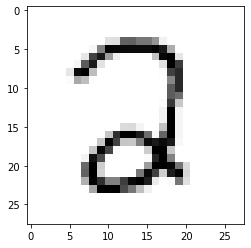

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2319
Training Accuracy: 0.7591, Testing Accuracy: 0.7812



Epoch 10, Loss 0.0818
Training Accuracy: 0.9227, Testing Accuracy: 0.9325



Epoch 20, Loss 0.0513
Training Accuracy: 0.9483, Testing Accuracy: 0.9561



Epoch 30, Loss 0.0405
Training Accuracy: 0.9565, Testing Accuracy: 0.9637



Epoch 40, Loss 0.0351
Training Accuracy: 0.9624, Testing Accuracy: 0.9682



Epoch 50, Loss 0.0319
Training Accuracy: 0.9651, Testing Accuracy: 0.9708



Epoch 60, Loss 0.0297
Training Accuracy: 0.9672, Testing Accuracy: 0.9728



Epoch 70, Loss 0.028
Training Accuracy: 0.9691, Testing Accuracy: 0.9728



Epoch 80, Loss 0.0267
Training Accuracy: 0.9710, Testing Accuracy: 0.9733



Epoch 90, Loss 0.0256
Training Accuracy: 0.9718, Testing Accuracy: 0.9733



Epoch 100, Loss 0.0246
Training Accuracy: 0.9726, Testing Accuracy: 0.9733



Epoch 110, Loss 0.0238
Training Accuracy: 0.9734, Testing Accuracy: 0.9738



Epoch 120, Loss 0.0231
Training Accuracy: 0.9745, Testing Accuracy: 0.9738



Epoch 130, Loss 0.0224
Training Accuracy: 0.9751, Testing Accuracy: 0.9743



Epoch 140, Loss 0.0218
Training Accuracy: 0.9757, Testing Accuracy: 0.9743



Epoch 150, Loss 0.0213
Training Accuracy: 0.9760, Testing Accuracy: 0.9748



Epoch 160, Loss 0.0208
Training Accuracy: 0.9763, Testing Accuracy: 0.9753



Epoch 170, Loss 0.0203
Training Accuracy: 0.9773, Testing Accuracy: 0.9758



Epoch 180, Loss 0.0198
Training Accuracy: 0.9778, Testing Accuracy: 0.9753



Epoch 190, Loss 0.0194
Training Accuracy: 0.9782, Testing Accuracy: 0.9758



Epoch 200, Loss 0.019
Training Accuracy: 0.9790, Testing Accuracy: 0.9758



Epoch 210, Loss 0.0186
Training Accuracy: 0.9793, Testing Accuracy: 0.9758



Epoch 220, Loss 0.0182
Training Accuracy: 0.9796, Testing Accuracy: 0.9753



Epoch 230, Loss 0.0178
Training Accuracy: 0.9801, Testing Accuracy: 0.9748



Epoch 240, Loss 0.0175
Training Accuracy: 0.9805, Testing Accuracy: 0.9758



0.03675180886763319

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2254
Training Accuracy: 0.7432, Testing Accuracy: 0.7384



Epoch 10, Loss 0.1027
Training Accuracy: 0.9066, Testing Accuracy: 0.9189



Epoch 20, Loss 0.0796
Training Accuracy: 0.9251, Testing Accuracy: 0.9385



Epoch 30, Loss 0.0688
Training Accuracy: 0.9341, Testing Accuracy: 0.9466



Epoch 40, Loss 0.0623
Training Accuracy: 0.9382, Testing Accuracy: 0.9516



Epoch 50, Loss 0.0578
Training Accuracy: 0.9427, Testing Accuracy: 0.9551



Epoch 60, Loss 0.0544
Training Accuracy: 0.9455, Testing Accuracy: 0.9592



Epoch 70, Loss 0.0518
Training Accuracy: 0.9469, Testing Accuracy: 0.9602



Epoch 80, Loss 0.0498
Training Accuracy: 0.9492, Testing Accuracy: 0.9617



Epoch 90, Loss 0.048
Training Accuracy: 0.9508, Testing Accuracy: 0.9627



Epoch 100, Loss 0.0466
Training Accuracy: 0.9516, Testing Accuracy: 0.9637



Epoch 110, Loss 0.0453
Training Accuracy: 0.9530, Testing Accuracy: 0.9642



Epoch 120, Loss 0.0442
Training Accuracy: 0.9540, Testing Accuracy: 0.9667



Epoch 130, Loss 0.0433
Training Accuracy: 0.9550, Testing Accuracy: 0.9672



Epoch 140, Loss 0.0424
Training Accuracy: 0.9558, Testing Accuracy: 0.9672



Epoch 150, Loss 0.0417
Training Accuracy: 0.9564, Testing Accuracy: 0.9672



Epoch 160, Loss 0.041
Training Accuracy: 0.9570, Testing Accuracy: 0.9677



Epoch 170, Loss 0.0403
Training Accuracy: 0.9579, Testing Accuracy: 0.9688



Epoch 180, Loss 0.0398
Training Accuracy: 0.9580, Testing Accuracy: 0.9688



Epoch 190, Loss 0.0392
Training Accuracy: 0.9588, Testing Accuracy: 0.9688



Epoch 200, Loss 0.0387
Training Accuracy: 0.9593, Testing Accuracy: 0.9688



Epoch 210, Loss 0.0383
Training Accuracy: 0.9597, Testing Accuracy: 0.9688



Epoch 220, Loss 0.0379
Training Accuracy: 0.9603, Testing Accuracy: 0.9688



Epoch 230, Loss 0.0375
Training Accuracy: 0.9604, Testing Accuracy: 0.9693



Epoch 240, Loss 0.0371
Training Accuracy: 0.9605, Testing Accuracy: 0.9693



0.04060341873958206

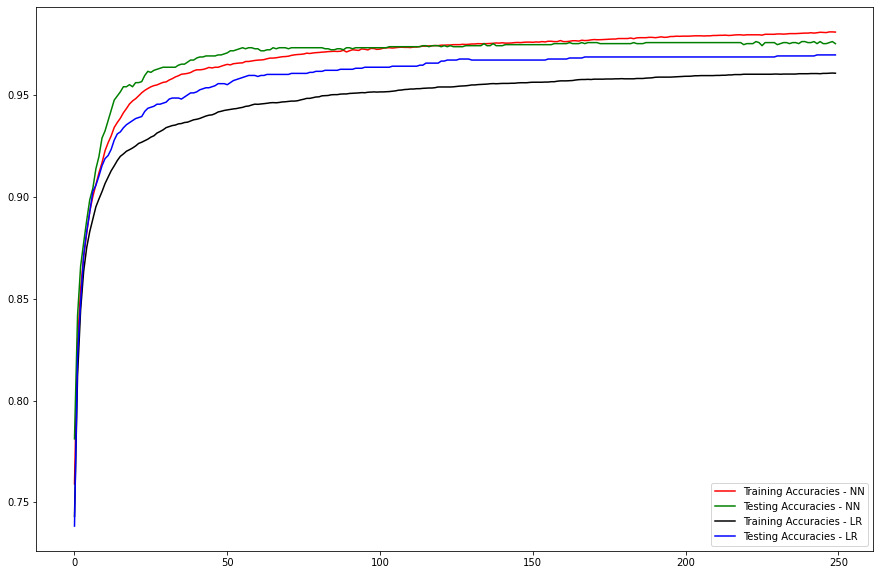

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

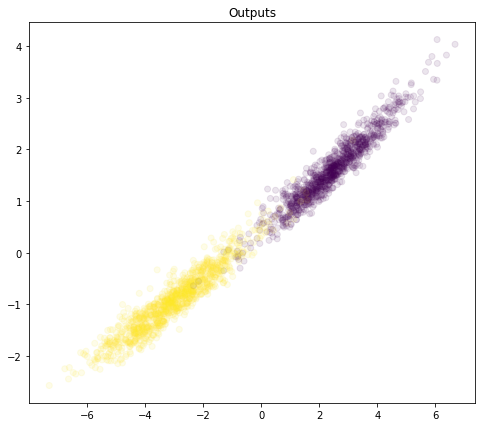

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

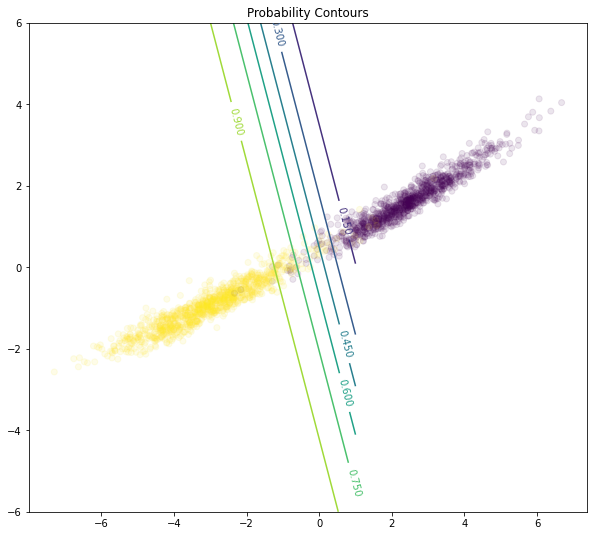

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );